# Version control
V1 - Here I made predictions at the data locations, not great 

V2 - Switched the predictions to the Grid locations

V3 - Matern, fixing tau=0

TO DO -  noise? 


# Start with the derivatives of a squared exponential

In [16]:
import gphelmholtz, numpy as np, matplotlib.pyplot as plt
import gphelmholtz.kernel 
from gptide import GPtideScipy
from scipy import linalg as la

ker = 'helmholtz'
ker = 'streamfunction'
# ker = 'velocitypotential'

if ker == 'helmholtz':
    my_kernel = gphelmholtz.kernel.HelmholtzKernel
    params=['psi', 'phi', 'u', 'v']
elif ker == 'streamfunction':
    my_kernel = gphelmholtz.kernel.StreamFunctionKernel
    params=['psi', 'u', 'v']
elif ker == 'velocitypotential':
    my_kernel = gphelmholtz.kernel.PotentialKernel
    params=['phi', 'u', 'v']

noise = 0

N = 20
# N = 10
L = 0.5
L = 1.

dx = 4*L/N
dy = 4*L/N

dx = 4/N
dy = 4/N

dx = 0.2
dy = 0.2

ν = 2.5
covparams = (1., L, ν)

# Input data points
xd = np.arange(0, dx*N, dx)[:,None]-dx/2
yd = np.arange(0, dy*N, dy)[:,None]-dy/2
yd = np.arange(0, dy*N*1.5, dy)[:,None]-dy/2
# yd = np.arange(0, dy*N*1.5, dy)[:,None]-dy/2

# Make a grid
Xg, Yg = np.meshgrid(xd, yd)

# Vectorise grid and stack
Xv = Xg.ravel()
Yv = Yg.ravel()

X = np.hstack([Xv[:,None], Yv[:,None]])

# Breaking the "no abstract class" mantra of gptide here...
K = my_kernel(kernel='matern')
K = my_kernel(kernel='matern 3/2')
# K = my_kernel(kernel='matern 1/2')
# K = my_kernel()


Got location jitter now, 5
Initialising SF Kernel
INITIALISED
Got location jitter now, 5
Initialising SF Kernel
INITIALISED


# Check out K

In [17]:
K.dF_dx

-sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2))

In [18]:
K.d2F_dydxp

-sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(x - x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + 3*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(-x + x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2)) - 6*(-x + x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2))

Text(0, 0.5, 'Variance')

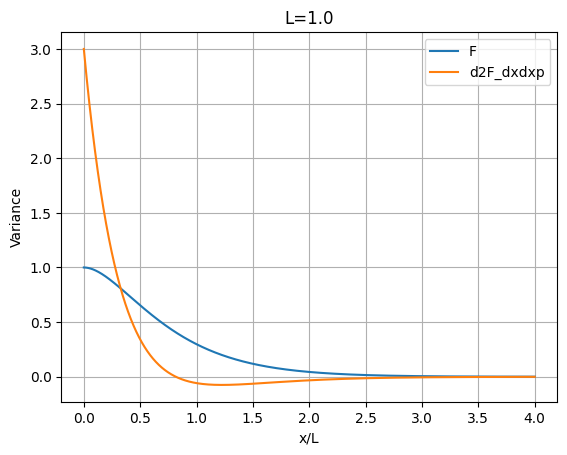

In [19]:
x = np.arange(0.000001, 4, 0.000001)
# x = np.arange(0.00000, 4, 0.000001)
x_p = np.zeros_like(x)
y   = x
y_p = np.zeros_like(x)


C0 = K.F_np(x, y, x_p, y_p, 1, 1)
C  = K.d2F_dxdxp_np(x, y, x_p, y_p, 1, 1)
C

plt.plot(x, C0, label='F')
plt.plot(x, C, label='d2F_dxdxp')
plt.title('d2F_dxdxp_np')
plt.grid()
plt.legend()
plt.xlabel('x/L')
plt.title(f'L={L}')
plt.ylabel('Variance')


In [20]:
K.d2F_dxdxp

-sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(x - x_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) - sqrt(3)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + 3*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(-x + x_p)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2)) - 6*(-x + x_p)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2))

In [21]:
from sympy import symbols, sqrt, exp, diff, Function, functions, lambdify
import numpy as np, matplotlib.pyplot as plt


x, y, x_p, y_p, ℓ, γ, d = symbols('x y x_p y_p ℓ γ d')
# d = Function('d')
# d = x
d = sqrt((x-x_p)**2 + (y-y_p)**2)

F = exp(-(1/2)*d/ℓ) # matern 1/2 i.e. exponential

dF_dy     = diff(F, y)

print(F)
print(dF_dy)

exp(-0.5*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)
-0.5*(y - y_p)*exp(-0.5*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2))


In [22]:
tau = Function('tau')

print(F.replace(d, tau(x, x_p, y, y_p)))
print(dF_dy.replace(d, tau(x, x_p, y, y_p)).replace(d, tau(x, x_p, y, y_p)))

exp(-0.5*tau(x, x_p, y, y_p)/ℓ)
-0.5*(y - y_p)*exp(-0.5*tau(x, x_p, y, y_p)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2))


In [23]:
X.shape

(600, 2)

In [24]:
myK = K(X, X.copy().T, covparams)


CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0


<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2))
<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2))
<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(y - y_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y 

Number of C_uu exceeding var_uu of 2.999999999265153 is 600
Number of C_vv exceeding var_vv of 2.999999999265153 is 600


<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(x - x_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) - sqrt(3)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + 3*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(-x + x_p)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2)) - 6*(-x + x_p)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2))
<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((

[[-7.34846850e-10 -0.00000000e+00 -0.00000000e+00 ...  1.33589611e-04
   1.16479522e-04  1.00469982e-04]
 [-0.00000000e+00 -7.34846850e-10 -0.00000000e+00 ...  1.51450796e-04
   1.33589611e-04  1.16479522e-04]
 [-0.00000000e+00 -0.00000000e+00 -7.34846850e-10 ...  1.69580950e-04
   1.51450796e-04  1.33589611e-04]
 ...
 [ 1.33589611e-04  1.51450796e-04  1.69580950e-04 ... -7.34846850e-10
  -0.00000000e+00 -0.00000000e+00]
 [ 1.16479522e-04  1.33589611e-04  1.51450796e-04 ... -0.00000000e+00
  -7.34846850e-10 -0.00000000e+00]
 [ 1.00469982e-04  1.16479522e-04  1.33589611e-04 ... -0.00000000e+00
  -0.00000000e+00 -7.34846850e-10]]
No more jitter here!!


<lambdifygenerated-21>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(x - x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + 3*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(-x + x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2)) - 6*(-x + x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2))


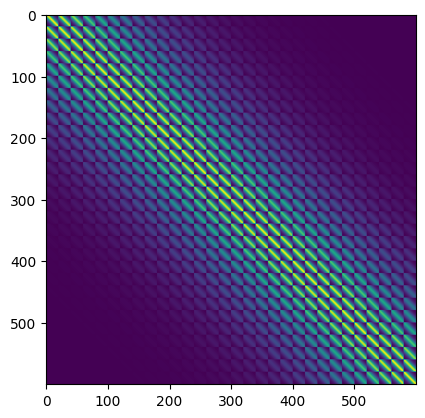

In [25]:
plt.imshow(K.C_psipsi)
# plt.imshow(K.C_psipsi[0:100, 0:100, ])


In [26]:

def Check_PSD(Matrix):
    e = np.linalg.eig(Matrix)[0]
    ie = np.imag(e)
    
    if np.allclose(Matrix, Matrix.T):
        t = ''
        t2 = '.'
    else:
        t = 'NOT '
        t2 = '!!!'

    print(f'The matrix is {t}symmetric{t2}')
    print(f'There are {sum(e<0)} negative eigenvalues')
    print(f'There are {sum(ie!=0)} nonzero imaginary eigenvalues')
    print(f'    {sum(ie!=0) - len(ie) + sum(np.isclose(ie, 0))} of these are very nearly zero...')
    print()

print('Sigma:')
Check_PSD(myK)


Sigma:
The matrix is symmetric.
There are 0 negative eigenvalues
There are 0 nonzero imaginary eigenvalues
    0 of these are very nearly zero...



In [27]:
jitter = 1e-7
la.cholesky(myK+jitter*np.eye(myK.shape[0]))


array([[ 1.00000005e+00,  9.52211314e-01,  8.46686820e-01, ...,
        -8.94032402e-05, -7.91505424e-05, -6.93473564e-05],
       [ 0.00000000e+00,  3.05440197e-01,  4.77954748e-01, ...,
        -4.82415213e-05, -4.59507390e-05, -4.29452611e-05],
       [ 0.00000000e+00,  0.00000000e+00,  2.33839235e-01, ...,
        -4.90742651e-05, -4.65601151e-05, -4.34566107e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.37573490e-01, -1.92690208e-01,  6.90776266e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  7.46637679e-01, -2.68263005e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  8.80077653e-01]])

600


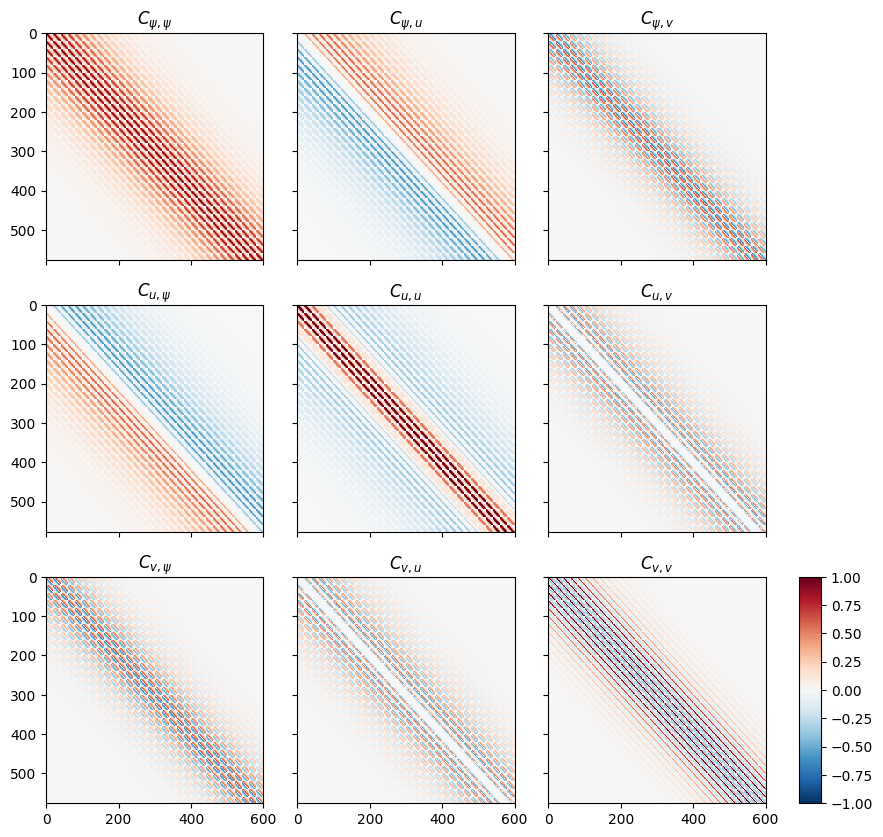

In [28]:
gphelmholtz.kernel.plot_cov(myK+1e2*np.eye(myK.shape[0]), params=params)

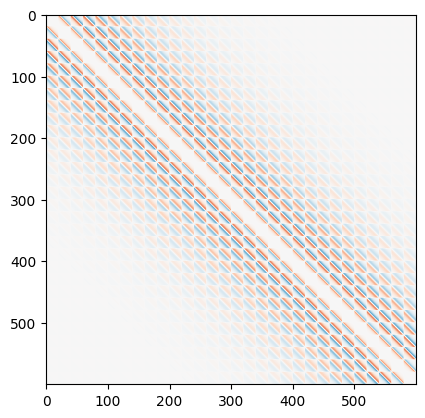

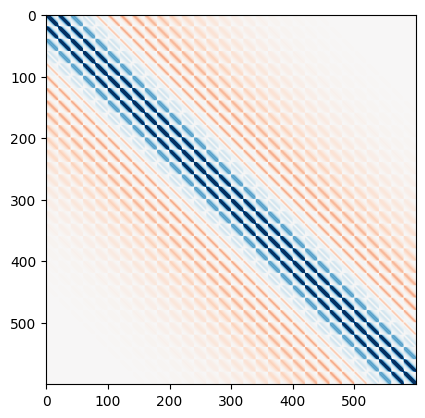

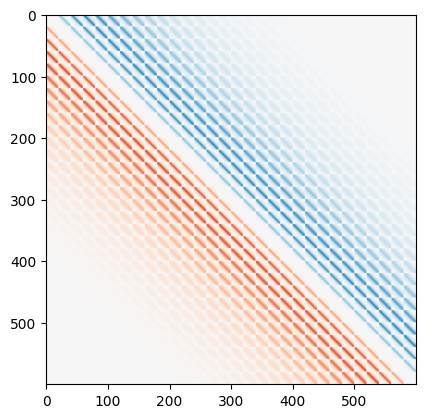

In [29]:
plt.imshow(K.C_uv, cmap='RdBu', vmin=-1, vmax=1)
plt.show()
plt.imshow(K.C_uu, cmap='RdBu', vmin=-1, vmax=1)
plt.show()
plt.imshow(K.C_psiu, cmap='RdBu', vmin=-1, vmax=1)
plt.show()

# Check out a draw

In [30]:
K

<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_24147/2387771907.py:27: SyntaxWarning: invalid escape sequence '\p'
  axs['psi'].set_title('Stream function ($\psi$)')
/tmp/ipykernel_24147/2387771907.py:32: SyntaxWarning: invalid escape sequence '\p'
  axs['phi'].set_title('Velocity potential ($\phi$)')
/tmp/ipykernel_24147/2387771907.py:34: SyntaxWarning: invalid escape sequence '\p'
  axs['phi'].colorbar = plt.colorbar(axs['phi'].collections[0], cax=axs['cb'], label='$\psi$ | $\phi$')
<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_

CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0


<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(y - y_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(y - y_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) - sqrt(3)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + 3*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(-y + y_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2)) - 6*(-y + y_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2))
<lambdifygenerated-18>:2: RuntimeWarning: divide by zero encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((

Number of C_uu exceeding var_uu of 2.999999999265153 is 600


<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(x - x_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) - sqrt(3)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + 3*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(-x + x_p)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2)) - 6*(-x + x_p)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2))
<lambdifygenerated-21>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((

Number of C_vv exceeding var_vv of 2.999999999265153 is 600
[[-7.34846850e-10 -0.00000000e+00 -0.00000000e+00 ...  1.33589611e-04
   1.16479522e-04  1.00469982e-04]
 [-0.00000000e+00 -7.34846850e-10 -0.00000000e+00 ...  1.51450796e-04
   1.33589611e-04  1.16479522e-04]
 [-0.00000000e+00 -0.00000000e+00 -7.34846850e-10 ...  1.69580950e-04
   1.51450796e-04  1.33589611e-04]
 ...
 [ 1.33589611e-04  1.51450796e-04  1.69580950e-04 ... -7.34846850e-10
  -0.00000000e+00 -0.00000000e+00]
 [ 1.16479522e-04  1.33589611e-04  1.51450796e-04 ... -0.00000000e+00
  -7.34846850e-10 -0.00000000e+00]
 [ 1.00469982e-04  1.16479522e-04  1.33589611e-04 ... -0.00000000e+00
  -0.00000000e+00 -7.34846850e-10]]
No more jitter here!!
CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0
Number of C_uu exceeding var_uu of 2.999999999265153 is 600
Number of C_vv exceeding var_vv of 2.999999999265153 is 600
[[-7.34846850e-10 -0.00000000e+00 -0.00000000e+00 ...  1.33589611e-04
   1.16479522e-04  1.00469982e-04]

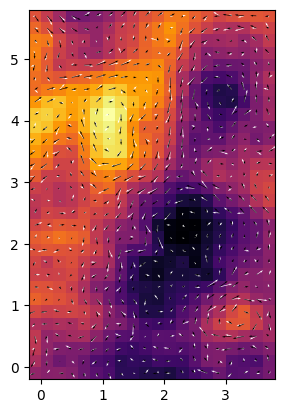

In [31]:
P = len(params)

if ker == 'helmholtz':
    GP = GPtideScipy(X, X.copy(), noise, K, covparams, P=P)

    zd = GP.prior(samples=1)

    psi_vec = zd[:GP.N//P]
    phi_vec = zd[1*GP.N//P:2*GP.N//P]  
    u_vec   = zd[2*GP.N//P:3*GP.N//P]
    v_vec   = zd[3*GP.N//P:4*GP.N//P]

    psig = psi_vec.reshape(Xg.shape)
    phig = phi_vec.reshape(Xg.shape)
    ug   = u_vec.reshape(Xg.shape)
    vg   = v_vec.reshape(Xg.shape)

    u_fd = -np.gradient(psig, axis=0)/dy + np.gradient(phig, axis=1)/dx
    v_fd =  np.gradient(psig, axis=1)/dx + np.gradient(phig, axis=0)/dy
    
    mosaic = [['psi', 'phi', 'cb']]
    fig, axs = plt.subplot_mosaic(mosaic, figsize=(10, 5), width_ratios=[1, 1, 0.05])

    axs['psi'].pcolormesh(Xg, Yg, psig, cmap='RdBu_r', vmin=-2, vmax=2)
    axs['psi'].quiver(Xg, Yg, ug, vg, color='w')
    axs['psi'].quiver(Xg, Yg, u_fd, v_fd)
    axs['psi'].set_title('Stream function ($\psi$)')

    axs['phi'].pcolormesh(Xg, Yg, phig, cmap='RdBu_r', vmin=-2, vmax=2)
    axs['phi'].quiver(Xg, Yg, ug, vg, color='w')
    axs['phi'].quiver(Xg, Yg, u_fd, v_fd)
    axs['phi'].set_title('Velocity potential ($\phi$)')

    axs['phi'].colorbar = plt.colorbar(axs['phi'].collections[0], cax=axs['cb'], label='$\psi$ | $\phi$')

    ue = 100*np.mean(np.abs(u_fd - ug)/ug)
    ve = 100*np.mean(np.abs(v_fd - vg)/vg)

    print(f'Mean absolute error on U was {ue:0.2f} %')
    print(f'Mean absolute error on U was {ve:0.2f} %')

else: # \psi

    GP = GPtideScipy(X, X.copy(), noise, K, covparams, P=P)

    zd = GP.prior(samples=1)

    psi_vec = zd[:GP.N//P]
    u_vec = zd[GP.N//P:2*GP.N//P]
    v_vec = zd[2*GP.N//P:3*GP.N//P]

    psig = psi_vec.reshape(Xg.shape)
    ug   = u_vec.reshape(Xg.shape)
    vg   = v_vec.reshape(Xg.shape)

    if ker == 'streamfunction':
        # psi is a stream function
        u_fd = -np.gradient(psig, axis=0)/dy
        v_fd =  np.gradient(psig, axis=1)/dx
    elif ker == 'velocitypotential':
        # phi is a velocity potential
        u_fd =  np.gradient(psig, axis=1)/dx
        v_fd =  np.gradient(psig, axis=0)/dy
    
    plt.pcolormesh(Xg, Yg, psig, cmap='inferno')
    plt.quiver(Xg, Yg, ug, vg, color='w')
    plt.quiver(Xg, Yg, u_fd, v_fd)

    ue = 100*np.mean(np.abs(u_fd - ug)/ug)
    ve = 100*np.mean(np.abs(v_fd - vg)/vg)

    print(f'Mean absolute error on U was {ue:0.2f} %')
    print(f'Mean absolute error on U was {ve:0.2f} %')

    plt.gca().set_aspect('equal')

# Sample this field with 2 Radars

This needs to be a function so that we can run it 1000 times 


In [32]:
# d_r    = 0.1
# ntheta = 20

# d_r    = 0.2
# ntheta = 10

d_r = 0.05  # What I want
d_r = 0.15  # Testing
d_r = 0.2 # Testing

ntheta_5deg = int(90/5+1)

# gridded_sample_points = False
ntheta = int(90/2+1) # Testing
# ntheta = int(90/1+1)

radar_1_x = 0.
radar_1_y = 0.
radar_1_ctheta = np.pi/2 - np.pi/4

radar_2_x = 3.6
radar_2_y = 0.
radar_2_ctheta = np.pi/2 + np.pi/4


def sample_radars(seed, verbose=False):

    np.random.seed(seed)

    ##
    def sample_one_radar(radar_x, radar_y, radar_ctheta, ntheta, ntheta_5deg):
            
        theta = radar_ctheta + np.linspace(-np.pi/4, np.pi/4, ntheta) 
        # radar_2_theta = radar_2_ctheta + np.linspace(-np.pi/4, np.pi/4, ntheta) 

        theta_5deg = radar_ctheta + np.linspace(-np.pi/4, np.pi/4, ntheta_5deg) 
        if verbose:
            print(f'theta_5deg shape {theta_5deg.shape}')
        # radar_2_theta_5deg = radar_2_ctheta + np.linspace(-np.pi/4, np.pi/4, ntheta_5deg) 

        r_ = np.arange(1.5, 4.5, d_r)
        r_ = np.arange(1.5, 6.5, d_r)
        r_ = np.arange(1.0, 6.5, d_r)

        T, r = np.meshgrid(theta, r_)
        if verbose:
            print(f'T shape {T.shape}')

        # T2, r2 = np.meshgrid(radar_2_theta, r)

        T_5deg, r_5deg = np.meshgrid(theta_5deg, r_)
        if verbose:
            print(f'T_5deg shape {T_5deg.shape}')

        # T2_5deg, r2_5deg = np.meshgrid(radar_2_theta_5deg, r)

        T += np.random.normal(0, 2*np.pi/180, size=T.shape)
        # T2 += np.random.normal(0, 2*np.pi/180, size=T2.shape)

        x = radar_x + r*np.cos(T)
        y = radar_y + r*np.sin(T)

        # x2 = radar_2_x + r2*np.cos(T2)
        # y2 = radar_2_y + r2*np.sin(T2)

        x_5deg = radar_x + r_5deg*np.cos(T_5deg)
        y_5deg = radar_y + r_5deg*np.sin(T_5deg)

        # x2_5deg = radar_2_x + r2_5deg*np.cos(T2_5deg)
        # y2_5deg = radar_2_y + r2_5deg*np.sin(T2_5deg)

        radar = {}
        radar['theta'] = theta
        radar['theta_5deg'] = theta_5deg
        radar['T'] = T
        radar['r'] = r
        radar['x'] = x
        radar['y'] = y
        radar['x_5deg'] = x_5deg
        radar['y_5deg'] = y_5deg
        radar['T_5deg'] = T_5deg
        radar['r_5deg'] = r_5deg

        radar['my_X'] = radar_x
        radar['my_Y'] = radar_y

        return radar
    
    radar1 = sample_one_radar(radar_1_x, radar_1_y, radar_1_ctheta, ntheta, ntheta_5deg)
    radar2 = sample_one_radar(radar_2_x, radar_2_y, radar_2_ctheta, ntheta, ntheta_5deg)

    ######
    ## For efficiency we want to remove any spatial points to the left or right of the radars
    ######
    def positional_filter(radar, other_radar_x):
        """Function to take a radar dictionary and filter with respect to another 
        radar location. Filters X coordinate only. Auto determines whether to be 
        higher or lower.

        Parameters
        ----------
             radar: (dict) the radar dict you want filtered 
             other_radar_x: (float) the x position of the other radar you want filtered

        Returns
        -------
            radar: (dict) the filtered radar dict

        """

        if radar['my_X'] < other_radar_x:
            posind = radar['x'] <= other_radar_x
        else:
            posind = radar['x'] >= other_radar_x
            
        radar['x'] = radar['x'][posind]
        radar['y'] = radar['y'][posind]
        radar['r'] = radar['r'][posind]
        radar['T'] = radar['T'][posind]

        if radar['my_X'] < other_radar_x:
            posind_5deg = radar['x_5deg'] <= other_radar_x
        else:
            posind_5deg = radar['x_5deg'] >= other_radar_x

        radar['x_5deg'] = radar['x_5deg'][posind_5deg]
        radar['y_5deg'] = radar['y_5deg'][posind_5deg]
        radar['r_5deg'] = radar['r_5deg'][posind_5deg]
        radar['T_5deg'] = radar['T_5deg'][posind_5deg]

        return radar
    
    radar1 = positional_filter(radar1, radar_2_x)
    radar2 = positional_filter(radar2, radar_1_x)

    return radar1, radar2

seed = 3
seed = 300

grid = {}
grid['x'] = Xg
grid['y'] = Yg

radar1, radar2 = sample_radars(seed)



/tmp/ipykernel_24147/2445275021.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_24147/2445275021.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Observation points 5 deg')

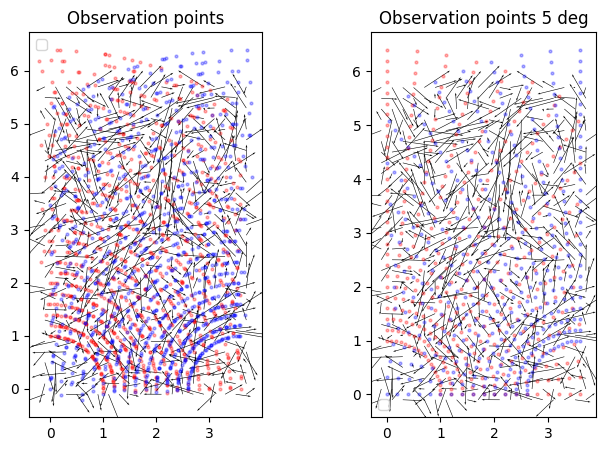

In [33]:
qs = 5/(L)
ALP = 0.3

fig, axs = plt.subplot_mosaic([[1, 2]], figsize=(8, 5))

plt.sca(axs[1])
plt.quiver(Xg, Yg, ug, vg, color='k', scale=qs, scale_units='xy')

plt.plot(radar1['x'], radar1['y'], 'r.', markersize=4, alpha=ALP)
plt.plot(radar2['x'], radar2['y'], 'b.', markersize=4, alpha=ALP)

plt.legend()
plt.gca().set_aspect('equal')
plt.title('Observation points')

plt.sca(axs[2])
plt.quiver(Xg, Yg, ug, vg, color='k', scale=qs, scale_units='xy')

plt.plot(radar1['x_5deg'] , radar1['y_5deg'] , 'r.', markersize=4, alpha=ALP)
plt.plot(radar2['x_5deg'] , radar2['y_5deg'] , 'b.', markersize=4, alpha=ALP)

plt.legend()
plt.gca().set_aspect('equal')
plt.title('Observation points 5 deg')


In [34]:
Xve = np.hstack([grid['x'].ravel(), radar1['x'].ravel(), radar2['x'].ravel(), radar1['x_5deg'].ravel(), radar2['x_5deg'].ravel()])
Yve = np.hstack([grid['y'].ravel(), radar1['y'].ravel(), radar2['y'].ravel(), radar1['y_5deg'].ravel(), radar2['y_5deg'].ravel()])
# Yve = np.hstack([Yv, y1.ravel(), y2.ravel(), y1_5deg.ravel(), y2_5deg.ravel()])
    
Xe = np.hstack([Xve[:,None], Yve[:,None]])

Xe.shape

(3380, 2)

In [35]:
Xve = np.hstack([Xv, radar1['x'].ravel(), radar2['x'].ravel(), radar1['x_5deg'].ravel(), radar2['x_5deg'].ravel()])
Yve = np.hstack([Yv, radar1['y'].ravel(), radar2['y'].ravel(), radar1['y_5deg'].ravel(), radar2['y_5deg'].ravel()])
# Yve = np.hstack([Yv, y1.ravel(), y2.ravel(), y1_5deg.ravel(), y2_5deg.ravel()])
    
Xe = np.hstack([Xve[:,None], Yve[:,None]])

def sample(Xe, grid, radar1, radar2, covparams):
# if True:

    P = 3

    GP = GPtideScipy(Xe, Xe.copy(), noise, K, covparams, P=P, jitter=1e-2)

    zd = GP.prior(samples=1)

    psi_vec = zd[:GP.N//P]
    u_vec   = zd[1*GP.N//P:2*GP.N//P]
    v_vec   = zd[2*GP.N//P:3*GP.N//P]

    # n_grid = N**2
    gs = Xg.shape
    n_grid = gs[0]*gs[1]

    n_rad1  = len(radar1['x'].ravel())
    n_rad1_5deg  = len(radar1['x_5deg'].ravel())
    n_rad2  = len(radar2['x'].ravel())
    n_rad2_5deg  = len(radar2['x_5deg'].ravel())

    print(f'n_rad2_5deg {n_rad2_5deg}')

    psi_vec = zd[:GP.N//P]
    u_vec = zd[GP.N//P:2*GP.N//P]
    v_vec = zd[2*GP.N//P:3*GP.N//P]


    s1      = radar1['x'].shape
    s1_5deg = radar1['x_5deg'].shape
    s2      = radar2['x'].shape
    s2_5deg = radar2['x_5deg'].shape
    print(f's2_5deg {s2_5deg}')

    # Extract the regular grid first
    start = 0
    end   = n_grid
    psig  = psi_vec[start: end].reshape(Xg.shape)
    ug    = u_vec[start: end].reshape(Xg.shape)
    vg    = v_vec[start: end].reshape(Xg.shape)

    grid['psi'] = psig
    grid['u'] = ug
    grid['v'] = vg

    # Extract the first observational set
    start = n_grid
    end   = n_grid + n_rad1
    radar1['u']    = u_vec[start:end].reshape(s1)
    radar1['v']    = v_vec[start:end].reshape(s1)

    # Extract the second observational set
    start = n_grid + n_rad1
    end   = n_grid + n_rad1 + n_rad2
    radar2['u'] = u_vec[start:end].reshape(s2)
    radar2['v'] = v_vec[start:end].reshape(s2)

    # Extract the first 5 deg set
    start = n_grid + n_rad1 + n_rad2
    end   = n_grid + n_rad1 + n_rad2 + n_rad1_5deg
    radar1['u_5deg'] = u_vec[start:end].reshape(s1_5deg)
    radar1['v_5deg'] = v_vec[start:end].reshape(s1_5deg)

    # Extract the second 5 deg set
    print(f'n_rad2_5deg {n_rad2_5deg}')
    print(f's2_5deg {s2_5deg}')

    start = n_grid + n_rad1 + n_rad2 + n_rad1_5deg
    end   = n_grid + n_rad1 + n_rad2 + n_rad1_5deg + n_rad2_5deg
    print(f'u_vec len {len(u_vec)}')
    print(f'vec len {len(u_vec[start:end])}')
    print(f'end {end}')
    radar2['u_5deg'] = u_vec[start:end].reshape(s2_5deg)
    radar2['v_5deg'] = v_vec[start:end].reshape(s2_5deg)

    # u1v      = radar1['u'].reshape(s1)
    # v1v      = radar1['v'].reshape(s1)
    # u1_5degv = radar1['u_5degv'].reshape(s1_5deg)
    # v1_5degv = radar1['v_5degv'].reshape(s1_5deg)

    # u2v      = radar2['u'].reshape(s2)
    # v2v      = radar2['v'].reshape(s2)
    # u2_5degv = radar2['u_5degv'].reshape(s2_5deg)
    # v2_5degv = radar2['v_5degv'].reshape(s2_5deg)

    radar1['rad'] = radar1['u']*np.cos(radar1['T']) + radar1['v']*np.sin(radar1['T'])
    radar2['rad'] = radar2['u']*np.cos(radar2['T']) + radar2['v']*np.sin(radar2['T'])

    # radar1['rad_5deg'] = radar1['u_5deg']*np.cos(radar1['T_5deg']) + radar2['v_5deg']*np.sin(radar1['T_5deg'])
    # radar2['rad_5deg'] = radar1['u_5deg']*np.cos(radar2['T_5deg']) + radar2['v_5deg']*np.sin(radar2['T_5deg'])
    radar1['rad_5deg'] = radar1['u_5deg']*np.cos(radar1['T_5deg']) + radar1['v_5deg']*np.sin(radar1['T_5deg'])
    radar2['rad_5deg'] = radar2['u_5deg']*np.cos(radar2['T_5deg']) + radar2['v_5deg']*np.sin(radar2['T_5deg'])

    radar1['rad_x'] = radar1['rad']*np.cos(radar1['T'])
    radar1['rad_y'] = radar1['rad']*np.sin(radar1['T'])

    radar1['rad_5deg_x'] = radar1['rad_5deg']*np.cos(radar1['T_5deg'])
    radar1['rad_5deg_y'] = radar1['rad_5deg']*np.sin(radar1['T_5deg'])

    radar2['rad_x']      = radar2['rad']*np.cos(radar2['T'])
    radar2['rad_y']      = radar2['rad']*np.sin(radar2['T'])

    radar2['rad_5deg_x'] = radar2['rad_5deg']*np.cos(radar2['T_5deg'])
    radar2['rad_5deg_y'] = radar2['rad_5deg']*np.sin(radar2['T_5deg'])

    return grid, radar1, radar2
##


# Actually sample
Slow cell

In [36]:
grid, radar1, radar2 = sample(Xe, grid, radar1, radar2, covparams)

CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0
Number of C_uu exceeding var_uu of 2.999999999265153 is 3392
Number of C_vv exceeding var_vv of 2.999999999265153 is 3394
[[-7.34846850e-10 -0.00000000e+00 -0.00000000e+00 ...  1.39512878e-04
   1.60859508e-04  1.41864278e-04]
 [-0.00000000e+00 -7.34846850e-10 -0.00000000e+00 ...  1.31794027e-04
   1.36070865e-04  8.74472878e-05]
 [-0.00000000e+00 -0.00000000e+00 -7.34846850e-10 ...  1.20211750e-04
   1.06481114e-04  2.95459628e-05]
 ...
 [ 1.39512878e-04  1.31794027e-04  1.20211750e-04 ... -7.34846850e-10
   3.89978579e-01  3.21543669e-01]
 [ 1.60859508e-04  1.36070865e-04  1.06481114e-04 ...  3.89978579e-01
  -7.34846850e-10  4.51772997e-01]
 [ 1.41864278e-04  8.74472878e-05  2.95459628e-05 ...  3.21543669e-01
   4.51772997e-01 -7.34846850e-10]]
No more jitter here!!
CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0
Number of C_uu exceeding var_uu of 2.999999999265153 is 3392
Number of C_vv exceeding var_vv of 2.999999

Plotting Now


/tmp/ipykernel_24147/1312793243.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


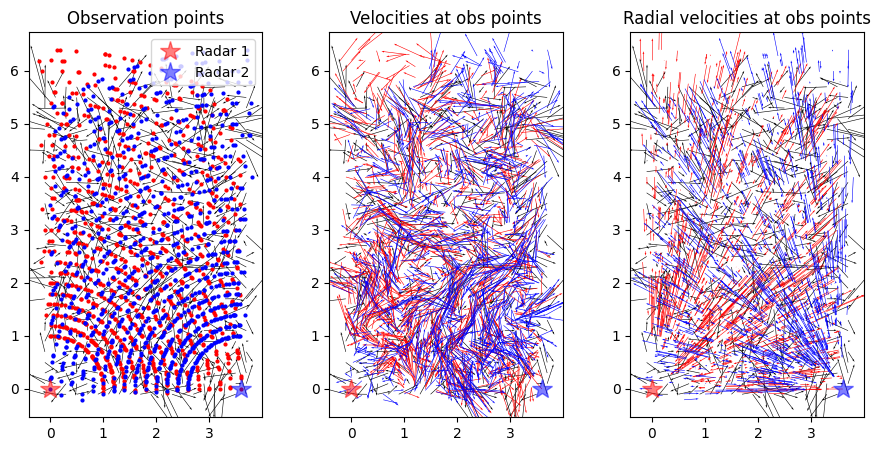

In [37]:
# plt.pcolormesh(Xg, Yg, psig, cmap='inferno')
print('Plotting Now')

qs = 5/(L)

fig, axs = plt.subplot_mosaic([[1, 2, 3]], figsize=(11, 5))

plt.sca(axs[1])
plt.quiver(grid['x'], grid['y'], grid['u'], grid['v'], color='k', scale=qs, scale_units='xy')

plt.plot(radar1['x'], radar1['y'], 'r.', markersize=4)
plt.plot(radar2['x'], radar2['y'], 'b.', markersize=4)

plt.legend()
plt.gca().set_aspect('equal')
plt.title('Observation points')

plt.sca(axs[2])
plt.quiver(grid['x'], grid['y'], grid['u'], grid['v'], color='k', scale=qs, scale_units='xy')

plt.quiver(radar1['x'], radar1['y'], radar1['u'], radar1['v'], color='r', scale=qs, scale_units='xy')
plt.quiver(radar2['x'], radar2['y'], radar2['u'], radar2['v'], color='b', scale=qs, scale_units='xy')

plt.gca().set_aspect('equal')
plt.title('Velocities at obs points')

plt.sca(axs[3])
plt.quiver(grid['x'], grid['y'], grid['u'], grid['v'], color='k', scale=qs, scale_units='xy')
plt.quiver(radar1['x'], radar1['y'], radar1['rad_x'], radar1['rad_y'], color='r', scale=qs, scale_units='xy')
plt.quiver(radar2['x'], radar2['y'], radar2['rad_x'], radar2['rad_y'], color='b', scale=qs, scale_units='xy')

plt.gca().set_aspect('equal')
plt.title('Radial velocities at obs points')

for label in axs.keys():
    
    axs[label].plot(radar_1_x, radar_1_y, 'r*', label='Radar 1', ms=15, alpha=0.5)
    axs[label].plot(radar_2_x, radar_2_y, 'b*', label='Radar 2', ms=15, alpha=0.5)

axs[1].legend()


# Radial binning code

Do it in a loop first. Yuck but it's fast enough!

/home/andrew/anaconda3/envs/surfacecurrents/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/andrew/anaconda3/envs/surfacecurrents/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'These are your 5 deg binned radials')

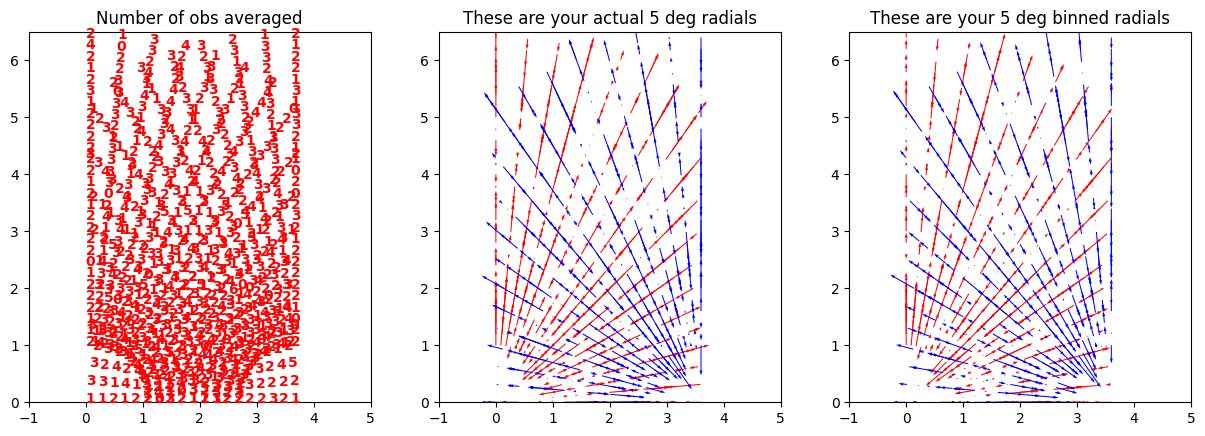

In [38]:
fig, axs = plt.subplot_mosaic([[1, 2, 3]], figsize=(15, 5))
plt.sca(axs[1])

# rad1_5deg_binned = np.zeros_like(radar1['rad_5deg'])
# rad2_5deg_binned = np.zeros_like(radar2['rad_5deg'])

# for m, (T1_5deg_, r1_5deg_) in enumerate(zip(T1_5deg, r1_5deg)):
#     for n, (T1_5deg__, r1_5deg__) in enumerate(zip(T1_5deg_, r1_5deg_)):

#         indr = np.abs(r1 - r1_5deg__) <= d_r/2
#         indt = np.abs(T1 - T1_5deg__) < 2.5*np.pi/180

#         ind = np.logical_and(indr, indt)
#         s = np.sum(ind)
#         # print(s)

#         rad1_5deg_binned[m, n] = np.mean(rad1[ind])

#         plt.text(x1_5deg[m, n], y1_5deg[m, n], s, color='r', weight='bold')
#     pass

# for m, (T2_5deg_, r2_5deg_) in enumerate(zip(T2_5deg, r2_5deg)):
#     for n, (T2_5deg__, r2_5deg__) in enumerate(zip(T2_5deg_, r2_5deg_)):

#         indr = np.abs(r2 - r2_5deg__) <= d_r/2
#         indt = np.abs(T2 - T2_5deg__) < 2.5*np.pi/180

#         ind = np.logical_and(indr, indt)
#         s = np.sum(ind)
#         # print(s)

#         rad2_5deg_binned[m, n] = np.mean(rad2[ind])

#         plt.text(x2_5deg[m, n], y2_5deg[m, n], s, color='b', weight='bold')

#     pass

def radial_bin(radar, color='r', verbose=True):

        _5deg_binned = np.zeros_like(radar['rad_5deg'])
        _5deg_s = np.zeros_like(radar['rad_5deg'])

        for m, (T_5deg_, r_5deg_) in enumerate(zip(radar['T_5deg'], radar['r_5deg'])):

                indr = np.abs(radar['r'] - r_5deg_) <= d_r/2
                indt = np.abs(radar['T'] - T_5deg_) < 2.5*np.pi/180

                ind = np.logical_and(indr, indt)
                s = np.sum(ind)
                # print(s)
                _5deg_s[m] = s

                _5deg_binned[m] = np.mean(radar['rad'][ind])

                if verbose:
                        plt.text(radar['x_5deg'][m], radar['y_5deg'][m], s, color=color, weight='bold')

        radar['rad_5deg_binned'] = _5deg_binned
        radar['5deg_s'] = _5deg_s

        radar['rad_5deg_binned_x'] = radar['rad_5deg_binned']*np.cos(radar['T_5deg'])
        radar['rad_5deg_binned_y'] = radar['rad_5deg_binned']*np.sin(radar['T_5deg'])

        return radar

radar1 = radial_bin(radar1)
radar2 = radial_bin(radar2)

# for m, (T2_5deg_, r2_5deg_) in enumerate(zip(T2_5deg, r2_5deg)):

#         indr = np.abs(r2 - r2_5deg_) <= d_r/2
#         indt = np.abs(T2 - T2_5deg_) < 2.5*np.pi/180

#         ind = np.logical_and(indr, indt)
#         s = np.sum(ind)
#         # print(s)

#         rad2_5deg_binned[m] = np.mean(rad2[ind])

#         plt.text(x2_5deg[m], y2_5deg[m], s, color='b', weight='bold')

plt.gca().set_aspect('equal')
plt.xlim(-1, 5)
plt.ylim(0, 6.5)
plt.title('Number of obs averaged')


plt.sca(axs[2])
plt.quiver(radar1['x_5deg'], radar1['y_5deg'], radar1['rad_5deg_x'], radar1['rad_5deg_y'], color='r', scale=qs, scale_units='xy')
plt.quiver(radar2['x_5deg'], radar2['y_5deg'], radar2['rad_5deg_x'], radar2['rad_5deg_y'], color='b', scale=qs, scale_units='xy')
plt.gca().set_aspect('equal')
plt.xlim(-1, 5)
plt.ylim(0, 6.5)
plt.title('These are your actual 5 deg radials')

plt.sca(axs[3])
plt.quiver(radar1['x_5deg'], radar1['y_5deg'], radar1['rad_5deg_binned_x'], radar1['rad_5deg_binned_y'], color='r', scale=qs, scale_units='xy')
plt.quiver(radar2['x_5deg'], radar2['y_5deg'], radar2['rad_5deg_binned_x'], radar2['rad_5deg_binned_y'], color='b', scale=qs, scale_units='xy')
plt.gca().set_aspect('equal')
plt.xlim(-1, 5)
plt.ylim(0, 6.5)
plt.title('These are your 5 deg binned radials')



# Now I have 3 choices of how to fit this GP 

1. One with the raw obs
2. One with the obs at the actual 5 m bins
3. One with the raw obs binned back to the 5 m bins 

In [39]:
option_names = ['Using raw data', 'Using TRUE data at 5 deg', 'Using BINNED data at 5 deg']

option = 1

def get_GP_data(radar1, radar2, option):

    if option == 1:
        
        T1_obs = radar1['T'].ravel()
        T2_obs = radar2['T'].ravel()

        # nr = n_rad

        x1_obs   = radar1['x']
        y1_obs   = radar1['y']
        u1_obs   = radar1['u']
        v1_obs   = radar1['v']
        rad1_obs = radar1['rad']

        x2_obs   = radar2['x']
        y2_obs   = radar2['y']
        u2_obs   = radar2['u']
        v2_obs   = radar2['v']
        rad2_obs = radar2['rad']


    if option in [2, 3]:
        
        T1_obs = radar1['T_5deg'].ravel()
        T2_obs = radar2['T_5deg'].ravel()

        # nr = n_rad_5deg
        x1_obs   = radar1['x_5deg'].ravel()
        y1_obs   = radar1['y_5deg'].ravel()
        u1_obs   = radar1['u_5deg'].ravel()
        v1_obs   = radar1['v_5deg'].ravel()

        x2_obs   = radar2['x_5deg'].ravel()
        y2_obs   = radar2['y_5deg'].ravel()
        u2_obs   = radar2['u_5deg'].ravel()
        v2_obs   = radar2['v_5deg'].ravel()

        if option == 2:
            rad1_obs = radar1['rad_5deg']
            rad2_obs = radar2['rad_5deg']

        if option == 3:
            rad1_obs = radar1['rad_5deg_binned']
            rad2_obs = radar2['rad_5deg_binned']

    option_name = option_names[option-1]

    return T1_obs, x1_obs, y1_obs, u1_obs, v1_obs, rad1_obs, T2_obs, x2_obs, y2_obs, u2_obs, v2_obs, rad2_obs, option_name
        
T1_obs, x1_obs, y1_obs, u1_obs, v1_obs, rad1_obs, T2_obs, x2_obs, y2_obs, u2_obs, v2_obs, rad2_obs, option_name = get_GP_data(radar1, radar2, option)


# Ordinary least squares to begin with 


We want $\mathbf{x}$

$$
\mathbf{x} = \begin{bmatrix} \begin{bmatrix} u^1_1 \\ 
                                    \vdots \\
                                    u^1_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} u^2_1 \\ 
                                    \vdots \\
                                    u^2_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} v^1_1 \\ 
                                    \vdots \\
                                    v^1_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} v^2_1 \\ 
                                    \vdots \\
                                    v^2_n \\ 
                    \end{bmatrix} \\
    \end{bmatrix}

$$

Which depends on the observed radial velocities $r$:

$$
\mathbf{r} = \begin{bmatrix} \begin{bmatrix} r^1_1 \\ 
                                    \vdots \\
                                    r^1_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} r^2_1 \\ 
                                    \vdots \\
                                    r^2_n \\ 
                    \end{bmatrix} \\
    \end{bmatrix}

$$

As

$$
\mathbf{r} = \mathbf{H}\mathbf{x} + \varepsilon
$$

Where the observational operator $\mathbf{H}$ is

$$
\mathbf{H} = \begin{bmatrix} \cos(\theta^1_1) & \cdots & 0 & 0 & \cdots & 0 & \sin(\theta^1_1) & \cdots & 0 & 0 & \cdots & 0 \\
                    \vdots & \ddots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
                    0 & \cdots & \cos(\theta^1_{nr1}) & 0 & \cdots & 0 & 0 & \cdots  & \sin(\theta^1_{nr1}) & 0 & \cdots & 0 \\
                    \\
                    0 & \cdots & 0 & \cos(\theta^2_1) & \cdots & 0 & 0 & \cdots & 0 & \sin(\theta^2_1) & \cdots & 0  \\
                    \vdots & \ddots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots  \\
                    0 & \cdots & 0 & 0 & \cdots & \cos(\theta^2_{nr2}) & 0 & \cdots & 0 & 0 & \cdots  & \sin(\theta^2_{nr2})  \\
    \end{bmatrix}
$$


Krigging formula:

$$
\mathbf{x} = \mathbf{B}\mathbf{H}^T(\mathbf{H}\mathbf{B}\mathbf{H}^T + \mathbf{R})^{-1} \mathbf{r}
$$

# Prediction at other 'unobserved points'

Say we have $n_r$ total radial observations and we want to make predictions at these plus abother $n_u$ unobserved points, for a total of $n=n_u+n_r$ observations. 

We want $\mathbf{x}$

$$
\mathbf{x} = \begin{bmatrix} \begin{bmatrix} u^g_1 \\ 
                                    \vdots \\
                                    u^g_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} u^1_1 \\ 
                                    \vdots \\
                                    u^1_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} u^2_1 \\ 
                                    \vdots \\
                                    u^2_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} v^g_1 \\ 
                                    \vdots \\
                                    v^g_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} v^1_1 \\ 
                                    \vdots \\
                                    v^1_n \\ 
                    \end{bmatrix} \\
                    \begin{bmatrix} v^2_1 \\ 
                                    \vdots \\
                                    v^2_n \\ 
                    \end{bmatrix} \\
    \end{bmatrix}

$$

And then the observation operator becomes:

$$
\mathbf{H} = \begin{bmatrix} 0_{nr \times nu} \,\, \mathrm{diag}(\cos(\theta)) \,\, 0_{nr \times nu} \,\, \mathrm{diag}(\sin(\theta))   \\
    \end{bmatrix}
$$

In [40]:
def do_GP(K, Xv, Yv, T1_obs, x1_obs, y1_obs, rad1_obs, T2_obs, x2_obs, y2_obs, rad2_obs, noise=0.5):
    """
    Currently, this does not predict the regular grid. 
    """
    
    T1_vec = T1_obs.ravel()
    T2_vec = T2_obs.ravel()

    rad1_vec = rad1_obs.ravel()
    rad2_vec = rad2_obs.ravel()

    # Remove nan from obs data
    ind1     = np.isnan(rad1_vec)
    T1_vec   = T1_vec[~ind1]
    rad1_vec = rad1_vec[~ind1]
    nr1      = len(rad1_vec)

    ind2     = np.isnan(rad2_vec)
    T2_vec   = T2_vec[~ind2]
    rad2_vec = rad2_vec[~ind2]
    nr2      = len(rad2_vec)

    # These are your radials
    r = np.vstack([rad1_vec[:,None], rad2_vec[:,None]])

    COS1 = np.diag(np.cos(T1_vec))
    SIN1 = np.diag(np.sin(T1_vec))

    COS2 = np.diag(np.cos(T2_vec))
    SIN2 = np.diag(np.sin(T2_vec))

    ZERO1 = np.zeros(shape=[nr1, nr2])
    ZERO2 = np.zeros(shape=[nr2, nr1])

    # print(H)

    #######################
    # NEXT CELL
    #######################
    nr = nr1 + nr2
    

    grid = True

    if not grid:
        nu = 0
        Xve = np.hstack([x1_obs.ravel()[~ind1], x2_obs.ravel()[~ind2]])
        Yve = np.hstack([y1_obs.ravel()[~ind1], y2_obs.ravel()[~ind2]])

        H = np.vstack([np.hstack([COS1, ZERO1, SIN1, ZERO1]), np.hstack([ZERO2, COS2, ZERO2, SIN2])])
    else:
        nu = len(Xv)

        ZEROU1 = np.zeros(shape=[nr1, nu])
        ZEROU2 = np.zeros(shape=[nr2, nu])

        Xve = np.hstack([Xv, x1_obs.ravel()[~ind1], x2_obs.ravel()[~ind2]])
        Yve = np.hstack([Yv, y1_obs.ravel()[~ind1], y2_obs.ravel()[~ind2]])

        H = np.vstack([np.hstack([ZEROU1, COS1, ZERO1, ZEROU1, SIN1, ZERO1]), np.hstack([ZEROU2, ZERO2, COS2, ZEROU2, ZERO2, SIN2])])
    
    Xe = np.hstack([Xve[:,None], Yve[:,None]])

    # Breaking the "no abstract class" mantra of gptide here...
    if False:
        # This is to use some new kernel
        K = my_kernel()
    else:
        # This was already defined
        pass

    # This includes the streamfunction
    B2_full = K(Xe, Xe.copy().T, covparams) 

    # Dropping the stream function
    # B2 = B2_full[2*nr::, 2*nr::] 
    if not grid:
        B2 = B2_full[nr1+nr2::, nr1+nr2::] # Dropping the stream function
    else:
        B2 = B2_full[nu+nr1+nr2::, nu+nr1+nr2::]

    print(nu, 'nu')
    print(nr, 'nr')
    print(2*nr, '2nr')
    print(nu+nr, 'n')
    print(2*(nu+nr), '2n')
    print(B2_full.shape)
    print('B', B2.shape, '2n x 2n')
    print('H', H.shape, 'n x 2n')

    #######################
    # NEXT CELL
    #######################
    # if not grid:
    BHT = B2 @ H.T
    HBHT = H @ B2 @ H.T

    # I'm really not sure this is the way to do this. With no obs error we have no RMSE. 
    R = noise*np.eye(nr1+nr2) # This is your observational error

    HBHT_inv = np.linalg.inv(HBHT + R)

    x = BHT @ HBHT_inv @ r

    # print(x.shape)
    # print(r.shape)

    if grid:
        x_ug = x[0:nu]
        x_u1 = x[nu:nu+nr1]
        x_u2 = x[nu+nr1:nu+nr1+nr2]
        x_vg = x[nu+nr1+nr2:2*nu+nr1+nr2]
        x_v1 = x[2*nu+nr1+nr2:2*nu+2*nr1+nr2]
        x_v2 = x[2*nu+2*nr1+nr2:2*nu+2*nr1+2*nr2]
    else:
        x_ug = None
        x_vg = None
        x_u1 = x[0:nr1]
        x_u2 = x[nr1:nr1+nr2]
        x_v1 = x[nr1+nr2:2*nr1+nr2]
        x_v2 = x[2*nr1+nr2:2*nr1+2*nr2]

    return x_ug, x_vg, x_u1, x_v1, ind1, x_u2, x_v2, ind2

x_ug, x_vg, x_u1, x_v1, ind1, x_u2, x_v2, ind2 = do_GP(K, Xv, Yv, T1_obs, x1_obs, y1_obs, rad1_obs, T2_obs, x2_obs, y2_obs, rad2_obs)


CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0
Number of C_uu exceeding var_uu of 2.999999999265153 is 2568
Number of C_vv exceeding var_vv of 2.999999999265153 is 2568
[[-7.34846850e-10 -0.00000000e+00 -0.00000000e+00 ...  6.89228513e-05
   1.34986397e-04  6.62146731e-05]
 [-0.00000000e+00 -7.34846850e-10 -0.00000000e+00 ... -1.57254035e-05
   7.64370755e-05 -1.92467537e-05]
 [-0.00000000e+00 -0.00000000e+00 -7.34846850e-10 ... -9.97126806e-05
   1.48117796e-05 -1.03898420e-04]
 ...
 [ 6.89228513e-05 -1.57254035e-05 -9.97126806e-05 ... -7.34846850e-10
   4.38591968e-01  2.23023635e-02]
 [ 1.34986397e-04  7.64370755e-05  1.48117796e-05 ...  4.38591968e-01
  -7.34846850e-10  4.43944751e-01]
 [ 6.62146731e-05 -1.92467537e-05 -1.03898420e-04 ...  2.23023635e-02
   4.43944751e-01 -7.34846850e-10]]
No more jitter here!!
600 nu
1968 nr
3936 2nr
2568 n
5136 2n
(7704, 7704)
B (5136, 5136) 2n x 2n
H (1968, 5136) n x 2n


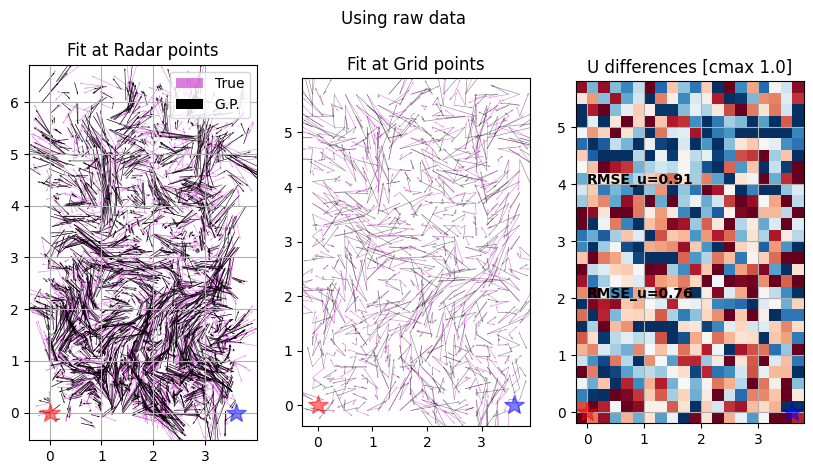

In [41]:

def calc_rmse(y1_obs, ind1, u1_obs, x_u1, y2_obs, ind2, u2_obs, x_u2, lower, upper):

    ind_y1 = np.logical_and(y1_obs[~ind1] > lower, y1_obs[~ind1] < upper)
    ind_y2 = np.logical_and(y2_obs[~ind2] > lower, y2_obs[~ind2] < upper)

    vector = np.hstack([u1_obs.ravel()[~ind1][ind_y1] - x_u1.ravel()[ind_y1], 
                        u2_obs.ravel()[~ind2][ind_y2] - x_u2.ravel()[ind_y2]])
    
    rmse_u = np.sqrt(np.mean(vector**2))

    return rmse_u


def calc_rmse_grid(y_grid, u_grid, x_u_grid, lower, upper):

    ind_y1 = np.logical_and(y_grid > lower, y_grid < upper)

    vector = u_grid.ravel()[ind_y1] - x_u_grid.ravel()[ind_y1]
    
    rmse_u = np.sqrt(np.mean(vector**2))

    return rmse_u


def plot_GP(x_ug, x_vg, x_u1, x_v1, ind1, x_u2, x_v2, ind2, x1_obs, y1_obs, u1_obs, v1_obs, x2_obs, y2_obs, u2_obs, v2_obs):

    qs = 5/(L**1)

    fig, axs = plt.subplot_mosaic([[1, 2, 3]], figsize=(10, 5))

    alp = 0.5
    axs[1].quiver(x1_obs.ravel()[~ind1], y1_obs.ravel()[~ind1], u1_obs.ravel()[~ind1], v1_obs.ravel()[~ind1], color='m', scale=qs, scale_units='xy', alpha=alp, label='True')
    axs[1].quiver(x2_obs.ravel()[~ind2], y2_obs.ravel()[~ind2], u2_obs.ravel()[~ind2], v2_obs.ravel()[~ind2], color='m', scale=qs, scale_units='xy', alpha=alp)

    # axs[1].quiver(x1_obs, y1_obs, u1_obs, v1_obs, color='m', scale=qs, scale_units='xy', alpha=alp, label='True')
    axs[2].quiver(Xv, Yv, x_ug, x_vg, color='m', scale=qs, scale_units='xy', alpha=alp)
    axs[2].quiver(grid['x'].ravel(), grid['y'].ravel(), grid['u'].ravel(), grid['v'].ravel(), color='k', scale=qs, scale_units='xy', alpha=alp)
    axs[2].set_title(f'Fit at Grid points')     
    axs[2].grid()

    cm = 0.5*2
    if False:
        axs[3].scatter(x2_obs.ravel()[~ind2], y2_obs.ravel()[~ind2], s=1, c=u2_obs.ravel()[~ind2]-x_u2.ravel(), vmin=-cm, vmax=cm, cmap='RdBu')
        axs[3].scatter(x1_obs.ravel()[~ind1], y1_obs.ravel()[~ind1], s=1, c=u1_obs.ravel()[~ind1]-x_u1.ravel(), vmin=-cm, vmax=cm, cmap='RdBu')
    else:
        du = grid['u']-x_ug.reshape(grid['u'].shape)

        # axs[3].scatter(grid['x'], grid['y'], s=1, c=du, vmin=-cm, vmax=cm, cmap='RdBu')
        axs[3].pcolormesh(grid['x'], grid['y'], du, vmin=-cm, vmax=cm, cmap='RdBu')
        pass

    alp = 1
    axs[1].quiver(x1_obs.ravel()[~ind1], y1_obs.ravel()[~ind1], x_u1, x_v1, color='k', scale=qs, scale_units='xy', alpha=alp, label='G.P.')
    axs[1].quiver(x2_obs.ravel()[~ind2], y2_obs.ravel()[~ind2], x_u2, x_v2, color='k', scale=qs, scale_units='xy', alpha=alp)

    axs[1].legend()
    axs[1].set_title(f'Fit at Radar points')     

    # ind_y1 = np.logical_and(y1_obs[~ind1] > 3, y1_obs[~ind1] < 5)
    # # rmse_u_1 = np.sqrt(np.mean((u1_obs.ravel()[~ind1][ind_y1] - x_u1.ravel()[ind_y1])**2))
    # # rmse_v_1 = np.sqrt(np.mean((v1_obs.ravel()[~ind1][ind_y1] - x_v1.ravel()[ind_y1])**2))
    # ind_y2 = np.logical_and(y2_obs[~ind2] > 3, y2_obs[~ind2] < 5)
    # vector = np.hstack([u1_obs.ravel()[~ind1][ind_y1] - x_u1.ravel()[ind_y1], 
    #                     u2_obs.ravel()[~ind2][ind_y2] - x_u2.ravel()[ind_y2]])
    # # rmse_u_2 = np.sqrt(np.mean((u2_obs.ravel()[~ind2][ind_y2] - x_u2.ravel()[ind_y2])**2))
    # # rmse_v_2 = np.sqrt(np.mean((v2_obs.ravel()[~ind2][ind_y2] - x_v2.ravel()[ind_y2])**2))
    # # rmse_u_ff = np.sqrt(np.mean(vector**2))
    # # print(rmse_u_ff)

    rmse_u_ff = calc_rmse(y1_obs, ind1, u1_obs, x_u1, y2_obs, ind2, u2_obs, x_u2, 3, 5) 
    rmse_u_nf = calc_rmse(y1_obs, ind1, u1_obs, x_u1, y2_obs, ind2, u2_obs, x_u2, 1, 3) 

    rmse_u_ff = calc_rmse_grid(grid['y'].ravel(), x_ug, grid['u'].ravel(), 3, 5) 
    rmse_u_nf = calc_rmse_grid(grid['y'].ravel(), x_ug, grid['u'].ravel(), 1, 3) 

    axs[3].text(0, 4, f'RMSE_u={rmse_u_ff:.2f}', weight='bold')
    axs[3].text(0, 2, f'RMSE_u={rmse_u_nf:.2f}', weight='bold')

    for label in [1, 2, 3]:
        
        axs[label].plot(radar_1_x, radar_1_y, 'r*', label='Radar 1', ms=15, alpha=0.5)
        axs[label].plot(radar_2_x, radar_2_y, 'b*', label='Radar 2', ms=15, alpha=0.5)
        axs[label].set_aspect('equal')      

        axs[label].grid()

    axs[3].set_title(f'U differences [cmax {cm}]')     
        
    plt.suptitle(option_name)

plot_GP(x_ug, x_vg, x_u1, x_v1, ind1, x_u2, x_v2, ind2, x1_obs, y1_obs, u1_obs, v1_obs, x2_obs, y2_obs, u2_obs, v2_obs)


## Now the other options

CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0


<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2))
<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2))
<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(y - y_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y 

Number of C_uu exceeding var_uu of 2.999999999265153 is 2568


<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + sqrt(3)*(x - x_p)**2*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) - sqrt(3)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*sqrt((x - x_p)**2 + (y - y_p)**2)) + 3*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(-x + x_p)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2)) - 6*(-x + x_p)*(x - x_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2))
<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((

Number of C_vv exceeding var_vv of 2.999999999265153 is 2568


<lambdifygenerated-21>:2: RuntimeWarning: invalid value encountered in divide
  return -sqrt(3)*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(x - x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + sqrt(3)*(x - x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ*((x - x_p)**2 + (y - y_p)**2)**(3/2)) + 3*(1 + sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)*(-x + x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2)) - 6*(-x + x_p)*(y - y_p)*exp(-sqrt(3)*sqrt((x - x_p)**2 + (y - y_p)**2)/ℓ)/(ℓ**2*((x - x_p)**2 + (y - y_p)**2))


[[-7.34846850e-10 -0.00000000e+00 -0.00000000e+00 ...  6.89228513e-05
   1.34986397e-04  6.62146731e-05]
 [-0.00000000e+00 -7.34846850e-10 -0.00000000e+00 ... -1.57254035e-05
   7.64370755e-05 -1.92467537e-05]
 [-0.00000000e+00 -0.00000000e+00 -7.34846850e-10 ... -9.97126806e-05
   1.48117796e-05 -1.03898420e-04]
 ...
 [ 6.89228513e-05 -1.57254035e-05 -9.97126806e-05 ... -7.34846850e-10
   4.38591968e-01  2.23023635e-02]
 [ 1.34986397e-04  7.64370755e-05  1.48117796e-05 ...  4.38591968e-01
  -7.34846850e-10  4.43944751e-01]
 [ 6.62146731e-05 -1.92467537e-05 -1.03898420e-04 ...  2.23023635e-02
   4.43944751e-01 -7.34846850e-10]]
No more jitter here!!
600 nu
1968 nr
3936 2nr
2568 n
5136 2n
(7704, 7704)
B (5136, 5136) 2n x 2n
H (1968, 5136) n x 2n


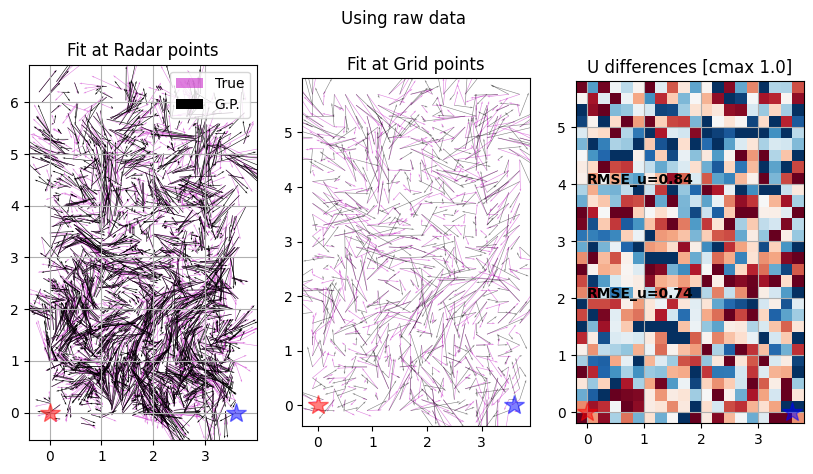

CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0
Number of C_uu exceeding var_uu of 2.999999999265153 is 1424
Number of C_vv exceeding var_vv of 2.999999999265153 is 1426
[[-7.34846850e-10 -0.00000000e+00 -0.00000000e+00 ...  1.39512878e-04
   1.60859508e-04  1.41864278e-04]
 [-0.00000000e+00 -7.34846850e-10 -0.00000000e+00 ...  1.31794027e-04
   1.36070865e-04  8.74472878e-05]
 [-0.00000000e+00 -0.00000000e+00 -7.34846850e-10 ...  1.20211750e-04
   1.06481114e-04  2.95459628e-05]
 ...
 [ 1.39512878e-04  1.31794027e-04  1.20211750e-04 ... -7.34846850e-10
   3.89978579e-01  3.21543669e-01]
 [ 1.60859508e-04  1.36070865e-04  1.06481114e-04 ...  3.89978579e-01
  -7.34846850e-10  4.51772997e-01]
 [ 1.41864278e-04  8.74472878e-05  2.95459628e-05 ...  3.21543669e-01
   4.51772997e-01 -7.34846850e-10]]
No more jitter here!!
600 nu
812 nr
1624 2nr
1412 n
2824 2n
(4236, 4236)
B (2824, 2824) 2n x 2n
H (812, 2824) n x 2n


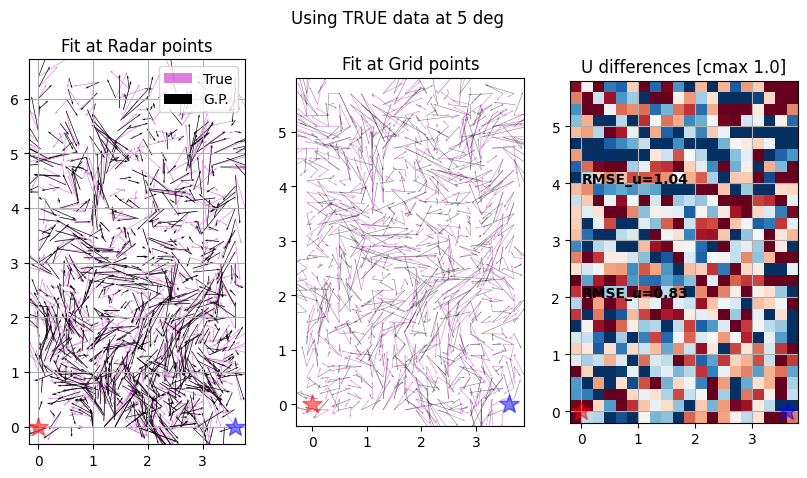

CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0
Number of C_uu exceeding var_uu of 2.999999999265153 is 1402
Number of C_vv exceeding var_vv of 2.999999999265153 is 1402
[[-7.34846850e-10 -0.00000000e+00 -0.00000000e+00 ...  1.39512878e-04
   1.60859508e-04  1.41864278e-04]
 [-0.00000000e+00 -7.34846850e-10 -0.00000000e+00 ...  1.31794027e-04
   1.36070865e-04  8.74472878e-05]
 [-0.00000000e+00 -0.00000000e+00 -7.34846850e-10 ...  1.20211750e-04
   1.06481114e-04  2.95459628e-05]
 ...
 [ 1.39512878e-04  1.31794027e-04  1.20211750e-04 ... -7.34846850e-10
   3.89978579e-01  3.21543669e-01]
 [ 1.60859508e-04  1.36070865e-04  1.06481114e-04 ...  3.89978579e-01
  -7.34846850e-10  4.51772997e-01]
 [ 1.41864278e-04  8.74472878e-05  2.95459628e-05 ...  3.21543669e-01
   4.51772997e-01 -7.34846850e-10]]
No more jitter here!!
600 nu
790 nr
1580 2nr
1390 n
2780 2n
(4170, 4170)
B (2780, 2780) 2n x 2n
H (790, 2780) n x 2n


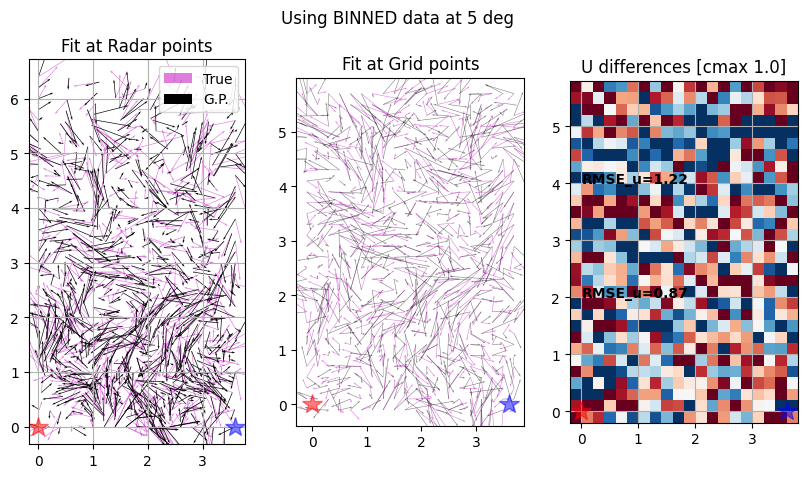

In [43]:

for option in [1, 2, 3]:
    
    outputs = get_GP_data(radar1, radar2, option)

    T1_obs, x1_obs, y1_obs, u1_obs, v1_obs, rad1_obs, T2_obs, x2_obs, y2_obs, u2_obs, v2_obs, rad2_obs, option_name = outputs
    
    x_ug, x_vg, x_u1, x_v1, ind1, x_u2, x_v2, ind2 = do_GP(K, Xv, Yv, T1_obs, x1_obs, y1_obs, rad1_obs, T2_obs, x2_obs, y2_obs, rad2_obs, noise=0.01)
    
    # rmse_u_ff = calc_rmse(y1_obs, ind1, u1_obs, x_u1, y2_obs, ind2, u2_obs, x_u2, 3, 5)
    # rmse_u_nf = calc_rmse(y1_obs, ind1, u1_obs, x_u1, y2_obs, ind2, u2_obs, x_u2, 1, 3)

    plot_GP(x_ug, x_vg, x_u1, x_v1, ind1, x_u2, x_v2, ind2, x1_obs, y1_obs, u1_obs, v1_obs, x2_obs, y2_obs, u2_obs, v2_obs)
    plt.show()


# Now calculate a bunch of times

In [183]:

#######################################################
## AT THE MOMENT NOISE IS FIXED, COULD CHANGE THIS!! ##
#######################################################

version = 'v1'
Ls = [0.25, 0.5, 0.75, 1.0]
n_iter = 100

version = 'v2'
Ls = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
n_iter = 15

version = 'v3'
L_s = [0.2*1.2229**a for a in range(0, 9)]
L_s = [np.round(L*100)/100 for L in L_s]
n_iter = 15

n_L = len(Ls)

outputs_nf = np.zeros(shape=[n_L, 3, n_iter])
outputs_ff = np.zeros(shape=[n_L, 3, n_iter])

for l, L in enumerate(Ls):
    for seed in np.arange(0, n_iter):
            
        print(f'L {l} Seed {seed}:')

        radar1, radar2 = sample_radars(seed)

        covparams = (1., L, np.nan)
        
        Xve = np.hstack([Xv, radar1['x'].ravel(), radar2['x'].ravel(), radar1['x_5deg'].ravel(), radar2['x_5deg'].ravel()])
        Yve = np.hstack([Yv, radar1['y'].ravel(), radar2['y'].ravel(), radar1['y_5deg'].ravel(), radar2['y_5deg'].ravel()])
        Xe = np.hstack([Xve[:,None], Yve[:,None]])

        # Generate a new flow field
        grid, radar1, radar2 = sample(Xe, grid, radar1, radar2, covparams)

        radar1 = radial_bin(radar1, verbose=False)
        radar2 = radial_bin(radar2, verbose=False)

        for option in [1, 2, 3]:

            print(f'L {l} Seed {seed} option {option}')

            outputs = get_GP_data(radar1, radar2, option)

            T1_obs, x1_obs, y1_obs, u1_obs, v1_obs, rad1_obs, T2_obs, x2_obs, y2_obs, u2_obs, v2_obs, rad2_obs, option_name = outputs
            
            x_ug, x_vg, x_u1, x_v1, ind1, x_u2, x_v2, ind2 = do_GP(Xv, Yv, T1_obs, x1_obs, y1_obs, rad1_obs, T2_obs, x2_obs, y2_obs, rad2_obs, noise=0.01)
            
            # rmse_u_ff = calc_rmse(y1_obs, ind1, u1_obs, x_u1, y2_obs, ind2, u2_obs, x_u2, 3, 5)
            # rmse_u_nf = calc_rmse(y1_obs, ind1, u1_obs, x_u1, y2_obs, ind2, u2_obs, x_u2, 1, 3)
                    
            rmse_u_ff = calc_rmse_grid(grid['y'].ravel(), x_ug, grid['u'].ravel(), 3, 5) 
            rmse_u_nf = calc_rmse_grid(grid['y'].ravel(), x_ug, grid['u'].ravel(), 1, 3) 

            outputs_nf[l, option-1, seed] = rmse_u_nf
            outputs_ff[l, option-1, seed] = rmse_u_ff
        

L 0 Seed 0:
No more jitter here!!
No more jitter here!!
n_rad2_5deg 406
s2_5deg (406,)
n_rad2_5deg 406
s2_5deg (406,)
u_vec len 3385
vec len 406
end 3385
L 0 Seed 0 option 1
Initialising SF Kernel
No more jitter here!!
600 nu
1973 nr
3946 2nr
2573 n
5146 2n
(7719, 7719)
B (5146, 5146) 2n x 2n
H (1973, 5146) n x 2n
L 0 Seed 0 option 2
Initialising SF Kernel
No more jitter here!!
600 nu
812 nr
1624 2nr
1412 n
2824 2n
(4236, 4236)
B (2824, 2824) 2n x 2n
H (812, 2824) n x 2n
L 0 Seed 0 option 3
Initialising SF Kernel
No more jitter here!!
600 nu
787 nr
1574 2nr
1387 n
2774 2n
(4161, 4161)
B (2774, 2774) 2n x 2n
H (787, 2774) n x 2n
L 0 Seed 1:
No more jitter here!!
No more jitter here!!
n_rad2_5deg 406
s2_5deg (406,)
n_rad2_5deg 406
s2_5deg (406,)
u_vec len 3383
vec len 406
end 3383
L 0 Seed 1 option 1
Initialising SF Kernel
No more jitter here!!
600 nu
1971 nr
3942 2nr
2571 n
5142 2n
(7713, 7713)
B (5142, 5142) 2n x 2n
H (1971, 5142) n x 2n
L 0 Seed 1 option 2
Initialising SF Kernel
No mo

In [184]:
L_s

[np.float64(0.2),
 np.float64(0.24),
 np.float64(0.3),
 np.float64(0.37),
 np.float64(0.45),
 np.float64(0.55),
 np.float64(0.67),
 np.float64(0.82),
 np.float64(1.0)]

In [185]:
import os
folder = 'rad_avg_outputs_grid_' + version

try:
    os.mkdir(folder)
    print('Directory made')
except:
    print('Directory already exists')
    pass
np.save(folder+'/.Ls.np', Ls)
np.save(folder+'/.outputs_nf.np', outputs_nf)
np.save(folder+'/.outputs_ff.np', outputs_ff)


Directory made


In [186]:
n_iter = 15


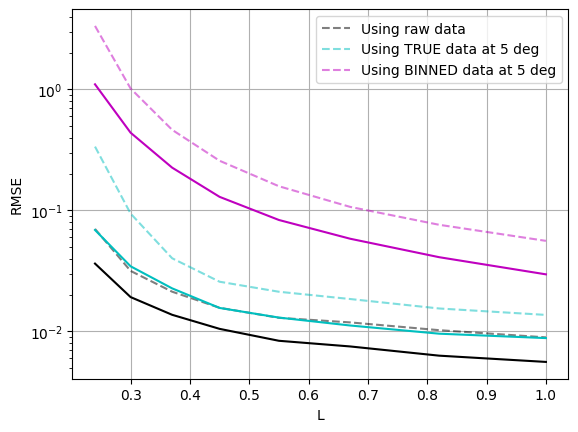

In [190]:
nl = outputs_nf.shape[0]
no = outputs_nf.shape[1]

cols = ['k', 'c', 'm', 'b']

plt.figure()

for o in np.arange(0, 3): # No need to plot option 0
    col = cols[o]

    datas_nf = []
    datas_ff = []
    for l in np.arange(nl):
    
        L = L_s[l]
        data_nf = outputs_nf[l, o, :]
        data_ff = outputs_ff[l, o, :]

        if False:
            x = L*np.ones_like(data_nf)
            plt.plot(x, data_nf, '.', color=col, alpha=0.1)
            plt.plot(x, data_ff, 'x', color=col, alpha=0.1)

        datas_nf += [np.mean(data_nf)]
        datas_ff += [np.mean(data_ff)]

    option_name = option_names[o]

    # plot_start
    ps = 1
    # plt.plot(Ls, datas_ff, '-', color=col, alpha=0.5, lw=4, label=option_name + ' F.F.')
    if False:
        plt.plot(L_s[ps::], datas_ff[ps::], '--', color=col, alpha=0.5, label=option_name + ' F.F.')
        plt.plot(L_s[ps::], datas_nf[ps::],       color=col, label=option_name + ' N.F.')
    else:
        plt.plot(L_s[ps::], datas_ff[ps::], '--', color=col, alpha=0.5, label=option_name)
        plt.plot(L_s[ps::], datas_nf[ps::],       color=col)

# plt.gca().set_yaxis('log')
plt.ylabel('RMSE')
plt.xlabel('L')

plt.legend()
plt.grid()

plt.gca().set_yscale('log')

plt.show()


    

# Not modularised below

(1856, 1)
(928, 1)


ValueError: Argument U has a size 464 which does not match 2228, the number of arrow positions

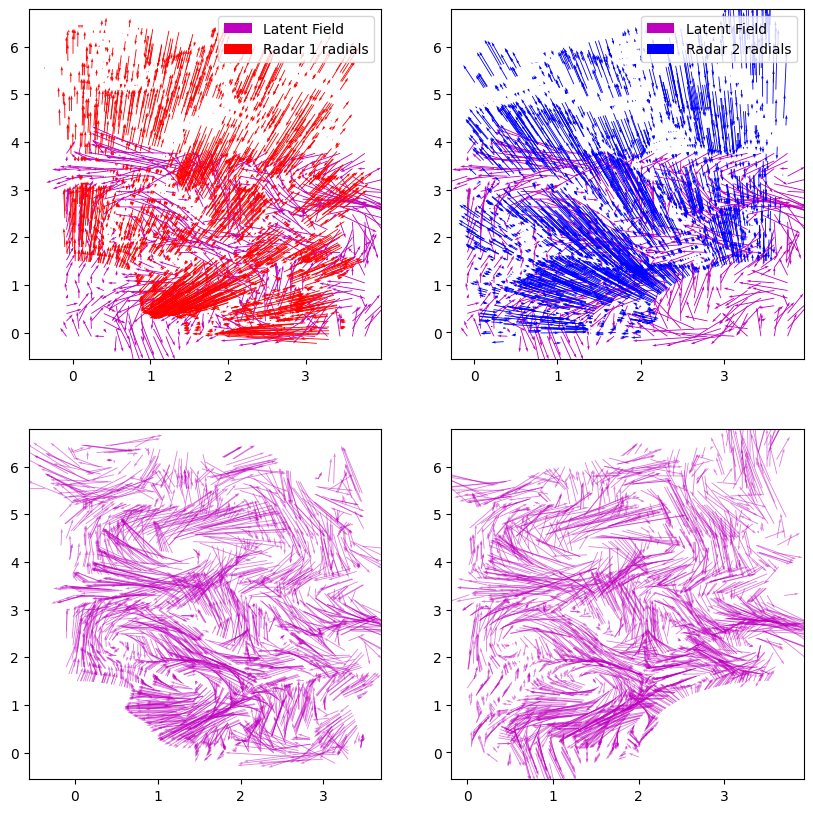

In [354]:
BHT = B2 @ H.T
HBHT = H @ B2 @ H.T

HBHT_inv = np.linalg.inv(HBHT + R)

x = BHT @ HBHT_inv @ r

print(x.shape)
print(r.shape)

x_u1 = x[0:nr1]
x_u2 = x[nr1:nr1+nr2]
x_v1 = x[nr1+nr2:2*nr1+nr2]
x_v2 = x[2*nr1+nr2:2*nr1+2*nr2]


qs = 5

fig, axs = plt.subplot_mosaic([[11, 12], [21, 22]], figsize=(10, 10))

axs[11].quiver(Xg, Yg, ug, vg, color='m', scale=qs, scale_units='xy', label='Latent Field')
axs[11].quiver(x1, y1, rad1_x, rad1_y, color='r', scale=qs, scale_units='xy', label='Radar 1 radials')
axs[11].legend()

axs[12].quiver(Xg, Yg, ug, vg, color='m', scale=qs, scale_units='xy', label='Latent Field')
axs[12].quiver(x2, y2, rad2_x, rad2_y, color='b', scale=qs, scale_units='xy', label='Radar 2 radials')
axs[12].legend()


# plt.quiver(x2, y2, rad2g_x, rad2g_y, color='b', scale=qs, scale_units='xy')

alp = 0.5
axs[21].quiver(x1, y1, u1v, v1v, color='m', scale=qs, scale_units='xy', alpha=alp, label='True')
axs[22].quiver(x2, y2, u2v, v2v, color='m', scale=qs, scale_units='xy', alpha=alp)

alp = 1
axs[21].quiver(x1, y1, x_u1, x_v1, color='k', scale=qs, scale_units='xy', alpha=alp, label='G.P.')
axs[22].quiver(x2, y2, x_u2, x_v2, color='k', scale=qs, scale_units='xy', alpha=alp)

axs[21].legend()

for label in axs.keys():
    
    axs[label].plot(radar_1_x, radar_1_y, 'r*', label='Radar 1', ms=15, alpha=0.5)
    axs[label].plot(radar_2_x, radar_2_y, 'b*', label='Radar 2', ms=15, alpha=0.5)
    axs[label].set_aspect('equal')      

    axs[label].grid()

for i, label in enumerate([21, 22]):
    axs[label].set_title(f'Fit at Radar {i+1} points')


for i, label in enumerate([11, 12]):
    axs[label].set_title(f'Radial data at Radar {i+1}')

axs[11].set_xlim(axs[21].get_xlim())
axs[11].set_ylim(axs[21].get_ylim())


axs[12].set_xlim(axs[22].get_xlim())
axs[12].set_ylim(axs[22].get_ylim())

plt.savefig('radar_fit.png')

# Geometric dilution of precision

In [17]:
Ls = [1., 1., 2, 2, 4, 4]
Ls = [1., 2, 4]
Ls = np.vstack([Ls, Ls]).T.ravel()

list(Ls)

[np.float64(1.0),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(4.0),
 np.float64(4.0)]

<>:95: SyntaxWarning: invalid escape sequence '\s'
<>:95: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2698/753339575.py:95: SyntaxWarning: invalid escape sequence '\s'
  axs[i].set_title(f'Error ellipses for $L={L}$ and $\sigma={sigma}$')


No more jitter here!!
Mean lambda_0 1.9806282276342458e-07
Mean lambda_1 3.230566538654575e-08
No more jitter here!!
Mean lambda_0 0.019219821905739336
Mean lambda_1 0.005035430901715451
No more jitter here!!
Mean lambda_0 0.04834662795633183
Mean lambda_1 0.016274732583818646
No more jitter here!!
Mean lambda_0 0.0077047007863081845
Mean lambda_1 0.0021995208122411246
No more jitter here!!
Mean lambda_0 0.02096898119226995
Mean lambda_1 0.00720318787938543
No more jitter here!!
Mean lambda_0 0.0034197435436816004
Mean lambda_1 0.0011561136774888385
No more jitter here!!
Mean lambda_0 0.009865089700748396
Mean lambda_1 0.0038130591556273636


/tmp/ipykernel_2698/753339575.py:95: SyntaxWarning: invalid escape sequence '\s'
  axs[i].set_title(f'Error ellipses for $L={L}$ and $\sigma={sigma}$')


NameError: name 'XTX' is not defined

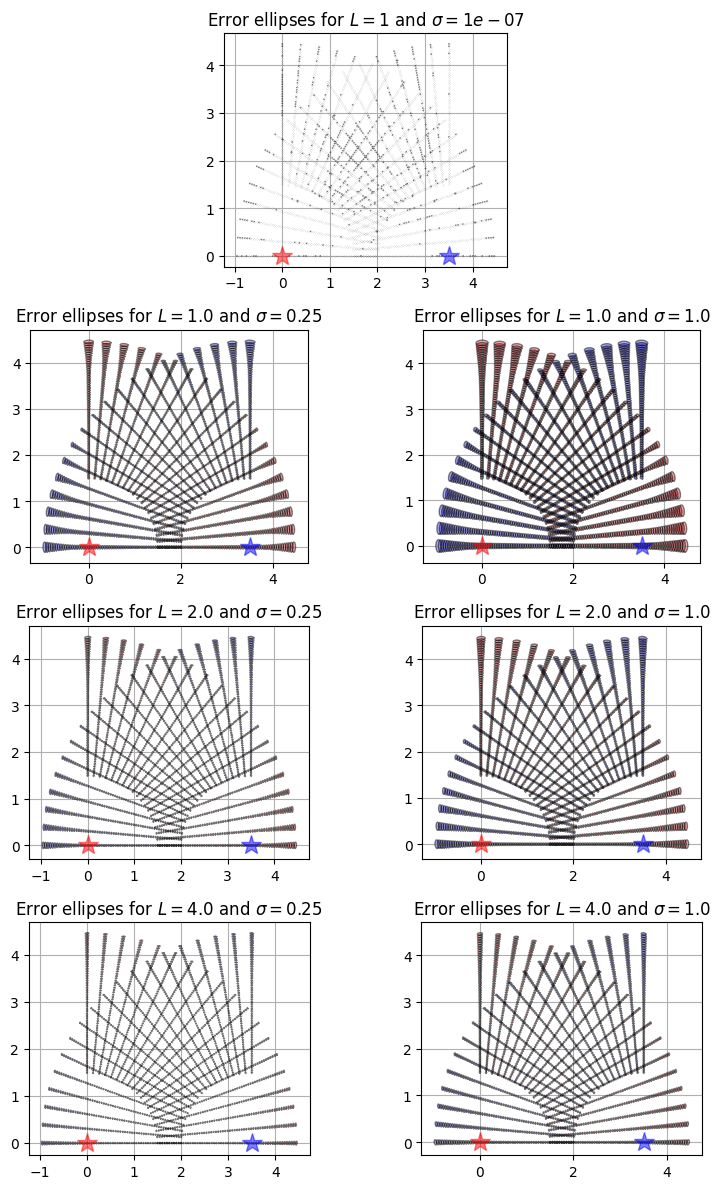

In [18]:
if False:
    XTX = BHT.T@BHT

    # XTX = B2@B2.T
    XTX = HBHT@HBHT.T

    XTX = BHT@BHT.T

    X = H @ B2 
    XTX = X.T @ ((1+1e-15)*np.eye(X.shape[0]))  @ X

    XTX_j = XTX + 1e-15*np.eye(XTX.shape[0]) # Make certain error columns invertible
    XTX_inv = np.linalg.inv(XTX_j)
    # XTX_inv = XTX

fig, axs = plt.subplot_mosaic([[0, 0], [1, 2], [3, 4], [5, 6]], figsize=(8, 12))

# Ls = [1., 1., 1.1, 1.1]
# Ls = [1., 1., 2, 2, 4, 4]
Ls = [1., 2, 4]
Ls = np.vstack([Ls, Ls]).T.ravel()
Ls = [1] + list(Ls)

Rss = [1e-7, 1.]*3
Rss = [1e-7] + [0.25, 1.]*3

for i, (L, sigma) in enumerate(zip(Ls, Rss)):
    # i+=1

    covparams = (1.*L, L, np.nan)

    # I should add one here where error scales on the radial DISTANCE

    R = sigma*np.eye(2*n_rad) # This is your observational error

    C2_full = K(Xe, Xe.copy().T, covparams) # This includes the streamfunction
    C2 = C2_full[2*n_rad::, 2*n_rad::] # Dropping the stream function

    assert(C2[-1, -1]==1.0)


    CHT = C2 @ H.T
    HCHT = H @ C2 @ H.T

    HCHT_inv = np.linalg.inv(HCHT + R)

    c = C2 - CHT @ HCHT_inv @ CHT.T # This is the prediction covariance

    Sigma_uu = np.diag(c[0:2*n_rad, 0:2*n_rad])
    Sigma_vv = np.diag(c[2*n_rad::, 2*n_rad::])
    Sigma_uv = np.diag(c[0:2*n_rad, 2*n_rad::])

    lambda_0 = []
    lambda_1 = []
    theta_e  = []

    for xx, yy, uu, vv, uv in zip(Xve, Yve, Sigma_uu, Sigma_vv, Sigma_uv):
        s = [[uu, uv], [uv, vv]]
        val, vec = np.linalg.eig(s)

        if val[0] >= val[1]:
            val0 = val[0]
            val1 = val[1]
            vec0 = vec[:, 0]
            vec1 = vec[:, 1]
        else:
            val0 = val[1]
            val1 = val[0]
            vec0 = vec[:, 1]
            vec1 = vec[:, 0]

        v1 = vec[0, :] # First eigenvector

        ang = np.arctan2(vec0[1], vec0[0])

        if False: # I don't know what convention this is. 
            ang = - ang # Just a convention thing 

        lambda_0 += [val0]
        lambda_1 += [val1]
        theta_e  += [ang]

        axs[i].plot(xx, yy, 'k.', ms=0.1)

    import gphelmholtz.ellipses as ellipses  

    lambda_0 = np.abs(np.array(lambda_0))
    lambda_1 = np.abs(np.array(lambda_1))

    ellipses.plot_ellipses(Xve[0:n_rad], Yve[0:n_rad], lambda_0[0:n_rad], lambda_1[0:n_rad], theta_e[0:n_rad], scale=1/5, ax=axs[i],fill_color='r')
    ellipses.plot_ellipses(Xve[n_rad::], Yve[n_rad::], lambda_0[n_rad::], lambda_1[n_rad::], theta_e[n_rad::], scale=1/5, ax=axs[i],fill_color='b')

    print('Mean lambda_0', np.mean(lambda_0))
    print('Mean lambda_1', np.mean(lambda_1))
    axs[i].set_title(f'Error ellipses for $L={L}$ and $\sigma={sigma}$')

for label in axs.keys():
    
    axs[label].plot(radar_1_x, radar_1_y, 'r*', label='Radar 1', ms=15, alpha=0.5)
    axs[label].plot(radar_2_x, radar_2_y, 'b*', label='Radar 2', ms=15, alpha=0.5)
    axs[label].set_aspect('equal')      

    axs[label].grid()

plt.tight_layout()
XTX.shape


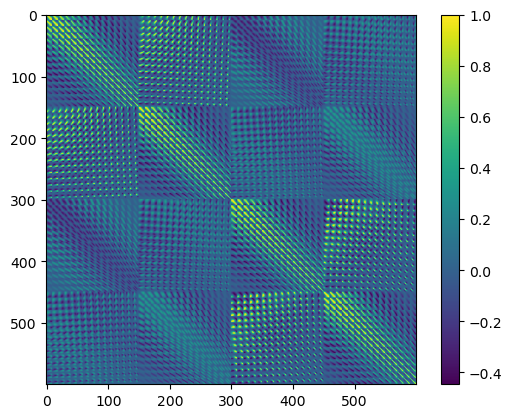

In [ ]:
plt.imshow(C2)
plt.colorbar()

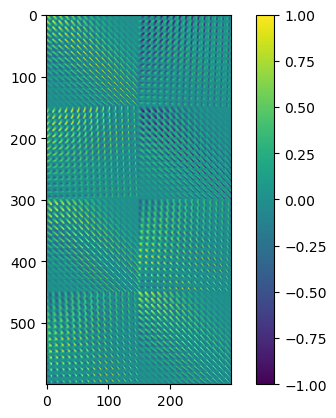

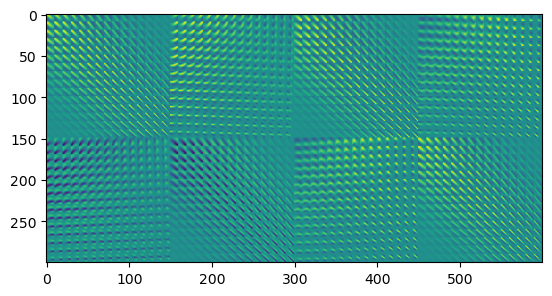

In [ ]:
plt.imshow(X.T)
plt.colorbar()

plt.show()
plt.imshow(X)

# XTX

In [ ]:
X.shape

(300, 600)

In [ ]:
XTX = X.T @ X

XTX_inv = np.linalg.inv(XTX)

In [ ]:
XTX
XTX_inv = np.linalg.inv(XTX)

In [ ]:
XTX_inv

array([[-2.77254126e+12,  6.16992225e+11,  4.10473996e+11, ...,
        -2.06425484e+12, -2.54384065e+12,  1.07935004e+12],
       [-7.61722028e+10,  2.61152406e+11,  9.18582406e+10, ...,
        -2.00119836e+12,  3.69309055e+12, -3.43663269e+12],
       [-7.71574608e+11, -2.53871854e+12,  3.48088781e+11, ...,
        -2.40963036e+12,  2.13457476e+12, -1.85350339e+12],
       ...,
       [-6.05845218e+11, -1.75941129e+12,  2.59962903e+12, ...,
         6.75192797e+11,  6.53696172e+12, -3.12971017e+12],
       [-8.70385220e+11, -1.76662326e+12, -3.43989290e+11, ...,
        -2.10586409e+11,  3.19851413e+12, -1.86198099e+12],
       [ 2.26294953e+12,  2.57309367e+12, -6.03429082e+11, ...,
        -2.65380016e+11, -4.02903692e+12,  1.69825731e+12]])

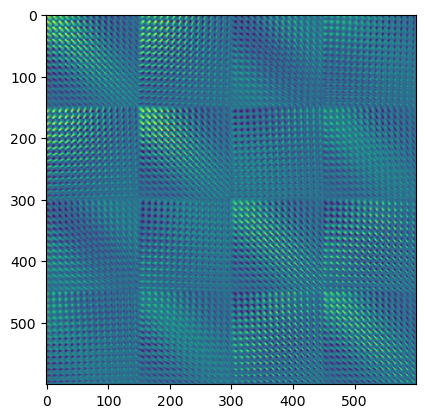

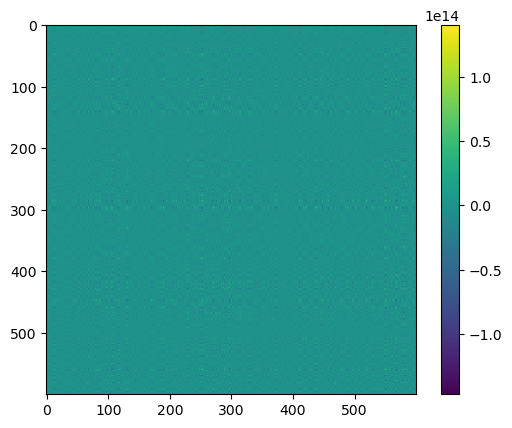

In [ ]:
plt.imshow(XTX)
plt.show()
plt.imshow(XTX_inv)
plt.colorbar()


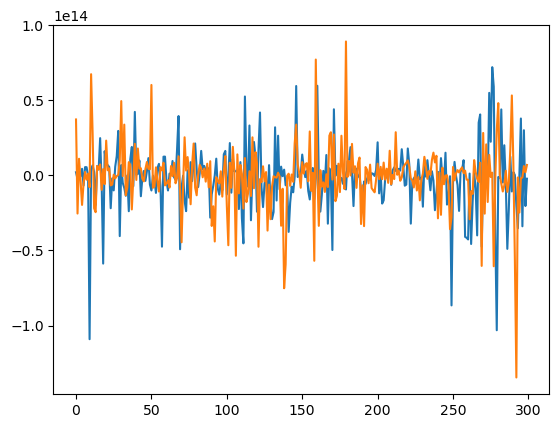

In [ ]:
plt.plot(Sigma_uu)
plt.plot(Sigma_vv)

Selected resolution: l


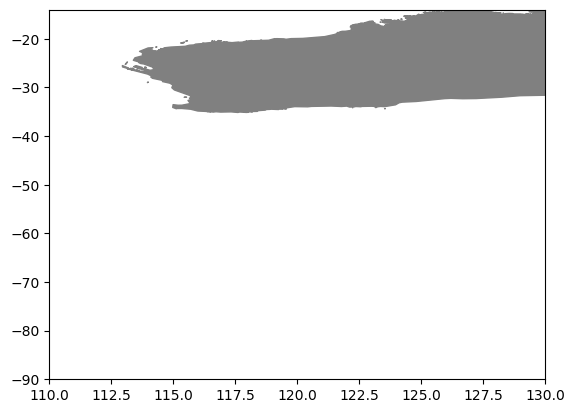

In [ ]:
import afloat
import afloat.plot
import afloat.plot.plotting

dir(afloat.plot.plotting)

plt.figure()
plt.gca().set_xlim(110, 130)
plt.gca().set_ylim(-90, -14)

afloat.plot.plotting.global_coast_fill(resolution='l')

